In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import h5py 
import numpy as np
import tifffile as tiff

In [2]:
folder_raw = "/Volumes/warm_archive/Philip_Dessy/Trainingsdaten_Kab_02_005/Kab_02_005_Subset"
folder_label = "/Volumes/warm_archive/Philip_Dessy/Trainingsdaten_Kab_02_005/Kab_02_005_Binary"

In [3]:

raw = np.empty([512,512,512],dtype=np.float32)

for i, file in enumerate(sorted(os.listdir(folder_raw))):
    img_path = os.path.join(folder_raw, file)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    raw[:,:,i] = img

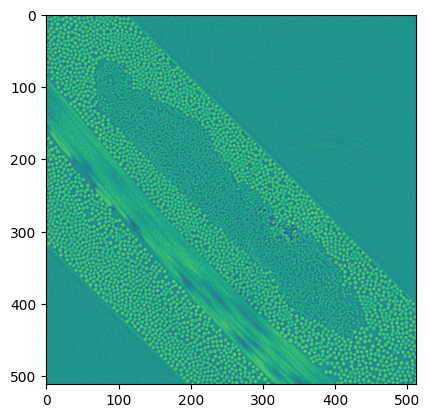

In [5]:
plt.imshow(raw[:,:,181])

Data Type: float32
Shape: (512, 512, 512)
Unique Values in Slice 1: [1.]


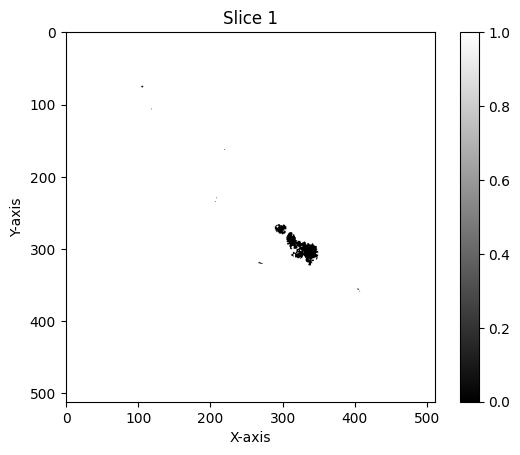

In [7]:

label_path = os.path.join(folder_label, "segmentation_01.tif")
# Load the full stack
label_stack = tiff.imread(label_path).astype(np.float32)

# Check data
# Check data
print("Data Type:", label_stack.dtype)  # Data type of the stack
print("Shape:", label_stack.shape)      # Shape of the stack (z, y, x)
print("Unique Values in Slice 1:", np.unique(label_stack[1, :, :]))  # Unique values in the 2nd slice

# Display a specific slice (e.g., slice 1)
slice_index = 1  # Replace with the desired slice index
plt.imshow(label_stack[181, :, :], cmap='gray')  # Display slice in grayscale
plt.colorbar()  # Add a color bar to visualize intensity range
plt.title(f"Slice {slice_index}")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

(2, 512, 512, 512)


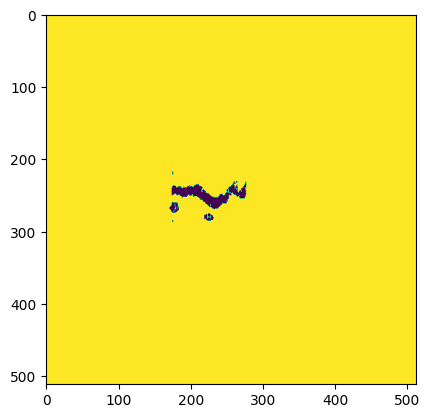

In [9]:
plt.imshow(masks[1,:,:,223])

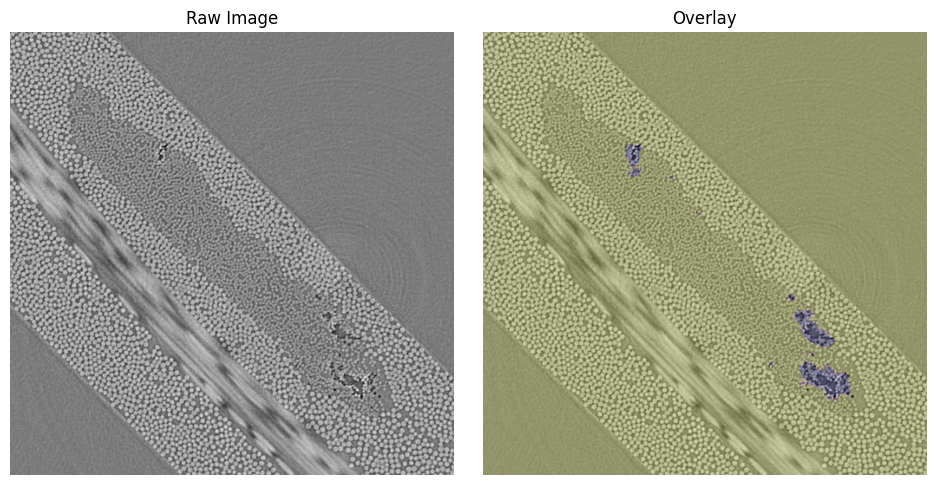

In [23]:
fig, axs = plt.subplots(1,2,figsize=(2*4.8,4.8))

axs = np.array(axs).flatten()

slice = 300

labels = label_stack.transpose(1,2,0)

# Display raw image
axs[0].imshow(raw[:, :, slice], cmap="gray")
axs[0].set_title("Raw Image")
axs[0].axis("off")

# Display labels
axs[1].imshow(raw[:, :, slice], cmap="gray")  # Base raw image
axs[1].imshow(labels[:, :, slice], cmap="plasma", alpha=0.2)  # Overlay labels
axs[1].set_title("Overlay")
axs[1].axis("off")

plt.tight_layout()
plt.show()

In [17]:
obj_ids = np.unique(labels)
obj_ids = obj_ids[0:]
masks = labels == obj_ids[:, None, None, None]

print(masks.shape)

(2, 512, 512, 512)


In [18]:
out = {"volume":raw,"labels":labels,"masks":masks}

In [19]:

with h5py.File("test.h5", 'w',) as fout:
    for key, data in out.items():

        fout.create_dataset(key, data = data,compression="gzip")

